In [ ]:
# import arcpy
# from arcpy import env
# import os
# from arcgis import GIS
# from arcgis.features import GeoAccessor
# from arcgis.features import GeoSeriesAccessor
# import pandas as pd

# import numpy as np
# import matplotlib.pyplot as plt

# arcpy.env.overwriteOutput = True
# arcpy.env.parallelProcessingFactor = "90%"

# # show all columns
# pd.options.display.max_columns = None

# # pd.DataFrame.spatial.from_featureclass(???)  
# # df.spatial.to_featureclass(location=???,sanitize_columns=False)  

# # gsa = arcgis.features.GeoSeriesAccessor(df['SHAPE'])  
# # df['AREA'] = gsa.area  # KNOW YOUR UNITS

In [ ]:
# # fill NA values in Spatially enabled dataframes (ignores SHAPE column)
# def fill_na_sedf(df_with_shape_column, fill_value=0):
#     if 'SHAPE' in list(df_with_shape_column.columns):
#         df = df_with_shape_column.copy()
#         shape_column = df['SHAPE'].copy()
#         del df['SHAPE']
#         return df.fillna(fill_value).merge(shape_column,left_index=True, right_index=True, how='inner')
#     else:
#         raise Exception("Dataframe does not include 'SHAPE' column")

In [ ]:
# if not os.path.exists('Outputs'):
#     os.makedirs('Outputs')
    
# outputs = ['.\\Outputs', "scratch.gdb", 'results.gdb']
# gdb = os.path.join(outputs[0], outputs[1])
# gdb2 = os.path.join(outputs[0], outputs[2])

# if not arcpy.Exists(gdb):
#     arcpy.CreateFileGDB_management(outputs[0], outputs[1])

# if not arcpy.Exists(gdb2):
#     arcpy.CreateFileGDB_management(outputs[0], outputs[2])

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

In [15]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## RF Built-in Feature Importance: Gini Importance

In [6]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
rf.feature_importances_

array([0.04120214, 0.00122857, 0.00635994, 0.00092522, 0.02328769,
       0.25275534, 0.0149026 , 0.05973071, 0.00291932, 0.02124589,
       0.01053109, 0.01452706, 0.55038442])

In [18]:
sorted_idx

array([11,  3,  1,  8,  2,  6,  9, 10,  7,  4,  0,  5, 12], dtype=int64)

Text(0.5, 0, 'Random Forest Feature Importance')

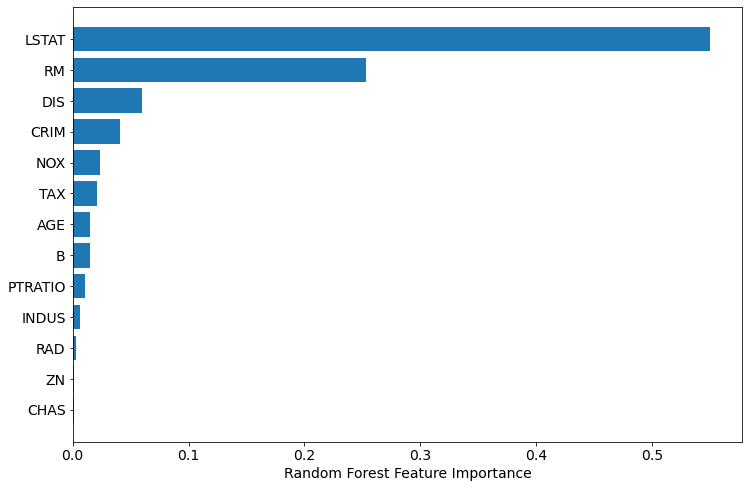

In [9]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## permutation based feature importance

In [11]:
perm_importance = permutation_importance(rf, X_test, y_test)


Text(0.5, 0, 'Permutation Importance')

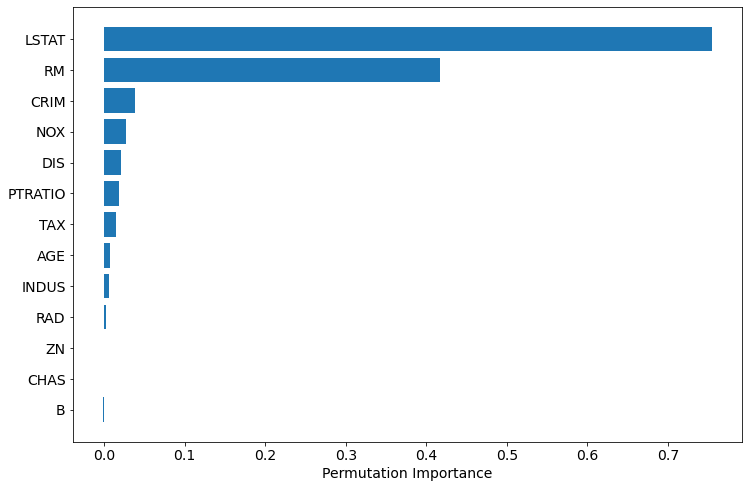

In [12]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

## Feature Importance Computed with SHAP Values

In [13]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

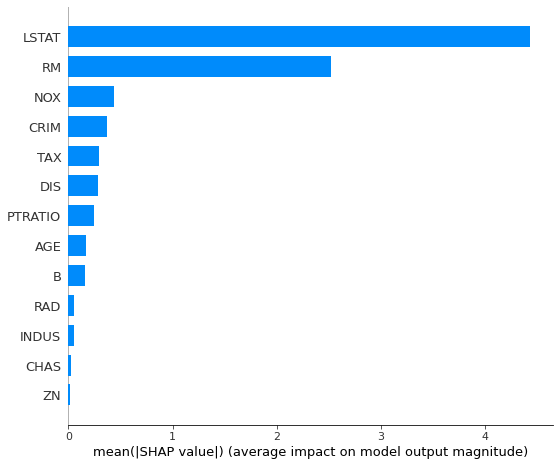

In [14]:
shap.summary_plot(shap_values, X_test, plot_type="bar")